# 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# 暂时只取 RM 这个特征
x = boston.data[:,5]
y = boston.target

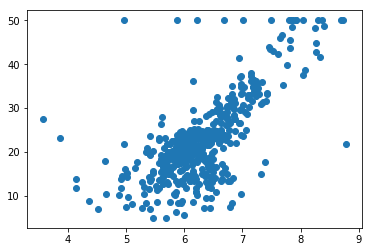

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
np.max(y)

50.0

In [10]:
# 删除等于50.0的数据
x = x[y<50.0]
y = y[y<50.0]

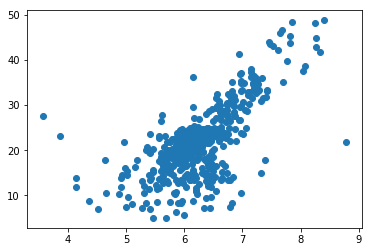

In [11]:
plt.scatter(x, y)
plt.show()

## 使用简单线性回归

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((367,), (123,), (367,), (123,))

In [18]:
%run SimpleLinerRegression.py

In [19]:
reg = SimpleLinerRegression2()
reg.fit(x_train, y_train)

In [20]:
reg.a_, reg.b_

(8.275912952194401, -29.922522268980217)

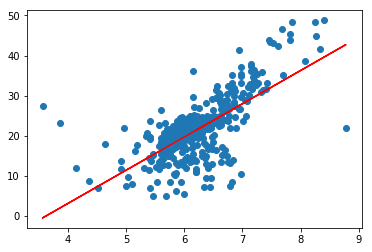

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [22]:
y_predict = reg.predict(x_test)

### MSE

In [24]:
mse_test = np.sum((y_predict-y_test)**2) / len(y_test)
mse_test

29.361072834953312

### RMSE

In [26]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.418585870405056

### MAE

In [27]:
mae_test = np.sum(np.absolute(y_predict-y_test)) / len(y_test)
mae_test

4.1440528038443

### scikit learn中mse和mae

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_predict)

29.361072834953312

In [29]:
mean_absolute_error(y_test, y_predict)

4.1440528038443